In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
# 1. BACA DATASET
file_path = 'data_20250601_071248.xlsx'  # ganti sesuai path file Anda
df = pd.read_excel(file_path)

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print("Kolom utama:", df.columns.tolist())

In [ ]:
# 2. DAFTAR SYMPTOMS (gejala) - sudah distandardisasi ke lowercase tanpa spasi/punctuation
symptoms_raw = [
    "mual",
    "muntah",
    "muntah terus-menerus",
	"muntah terus",
    "ruam",
    "ruam merah",
    "ruam kulit",
    "sakit kepala",
    "sakit kepala parah",
    "pusing",
    "demam",
    "demam tinggi",
    "nyeri perut",
    "nyeri tekan perut",
    "nyeri sendi",
    "nyeri otot",
    "nyeri badan",
    "nyeri mata",
    "nyeri di belakang mata",
    "leukopenia",
    "penurunan jumlah trombosit",
    "trombosit turun",
    "trombosit drop",
    "trombo drop",
    "trombosit",
    "trombosit kritis",
    "perdarahan mukosa",
    "mimisan",
    "perdarahan gusi",
	"pendarahan gusi",
    "perdarahan ringan",
	"pendarahan ringan",
    "perdarahan kulit",
	"pendarahan kulit",
    "perdarahan saluran cerna",
	"pendarahan saluran cerna",
    "kelesuan",
    "lesu",
    "lemas",
    "lemes",
    "gelisah",
    "reaksi hipersensitivitas",
    "inflamasi",
    "demam tanpa gejala lain",
    "dehidrasi",
    "sakit tenggorokan",
    "pilek",
    "flu",
    "pembengkakan kelenjar getah bening",
    "syok",
    "shock",
    "sesak napas",
    "gangguan kesadaran",
    "pingsan",
    "akumulasi cairan klinis",
    "efusi pleura",
    "asites",
    "penebalan dinding kandung empedu",
    "hepatomegali",
    "peningkatan hematokrit",
    "peningkatan AST",
    "peningkatan ALT"
]

# Fungsi untuk normalisasi string: lowercase, hapus tanda baca dan spasi
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9]', '', text)  # hanya huruf dan angka
    return text

# Normalisasi symptoms list
symptoms = [normalize_text(s) for s in symptoms_raw]
symptoms = list(set(symptoms))  # hilangkan duplikat

print(f"Jumlah gejala setelah normalisasi: {len(symptoms)}")

In [ ]:
# 3. FUNGSI UNTUK CEK KANDUNGAN SYMPTOMS DALAM TEKS
def contains_symptom(text):
    if pd.isna(text) or text == '':
        return False
    text_norm = normalize_text(text)
    for symptom in symptoms:
        if symptom in text_norm:
            return True
    return False

In [ ]:
# 4. FILTER DATA BERDASARKAN SYMPTOMS DI KOLOM text_cleaned_lower
df['has_symptom'] = df['text_cleaned_lower'].apply(contains_symptom)

filtered_df = df[df['has_symptom']].copy()
non_symptom_df = df[~df['has_symptom']].copy()  # Dataframe untuk non-symptom
print(f"Jumlah tweet yang mengandung gejala: {filtered_df.shape[0]} dari {df.shape[0]} total")
print(f"Jumlah tweet yang tidak mengandung gejala: {non_symptom_df.shape[0]} dari {df.shape[0]} total")


In [ ]:
# 5. ANALISIS FREKUENSI SYMPTOMS DALAM DATA TERFILTER (hanya untuk yang ada gejala)
def extract_symptoms(text):
    if pd.isna(text) or text == '':
        return []
    text_norm = normalize_text(text)
    found = []
    for symptom in symptoms:
        if symptom in text_norm:
            found.append(symptom)
    return found

filtered_df['symptoms_found'] = filtered_df['text_cleaned_lower'].apply(extract_symptoms)

# Flatten list semua symptoms yang ditemukan
all_found_symptoms = [sym for sublist in filtered_df['symptoms_found'] for sym in sublist]

symptom_counts = Counter(all_found_symptoms)
symptom_counts = symptom_counts.most_common()

print("\nTop 20 gejala yang paling sering muncul:")
for sym, cnt in symptom_counts[:20]:
    print(f"- {sym}: {cnt} kali")

Dataset loaded: 2480 rows, 28 columns
Kolom utama: ['Name', 'Handle', 'Timestamp', 'Verified', 'text', 'Comments', 'Retweets', 'Likes', 'Analytics', 'Tags', 'Mentions', 'Emojis', 'Profile Image', 'Tweet Link', 'Tweet ID', 'language', 'text_cleaned', 'text_cleaned_lower', 'text_cleaned_lower_length', 'cleaned_lower_tokens', 'token_count', 'cleaned_lower_tokens_no_stop', 'token_count_before_stop', 'token_count_after_stop', 'text_clean_final', 'text_stemmed', 'clean_length', 'stemmed_length']
Jumlah gejala setelah normalisasi: 62
Jumlah tweet yang mengandung gejala: 906 dari 2480 total
Jumlah tweet yang tidak mengandung gejala: 1574 dari 2480 total

Top 20 gejala yang paling sering muncul:
- demam: 446 kali
- trombosit: 224 kali
- mual: 102 kali
- lemes: 91 kali
- flu: 62 kali
- muntah: 60 kali
- sakitkepala: 59 kali
- demamtinggi: 58 kali
- pusing: 46 kali
- shock: 27 kali
- pilek: 26 kali
- pingsan: 26 kali
- mimisan: 25 kali
- trombositturun: 20 kali
- ruam: 19 kali
- nyeriotot: 17 kal

<ipython-input-10-3129c7ac312b>:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(labels), palette='mako')


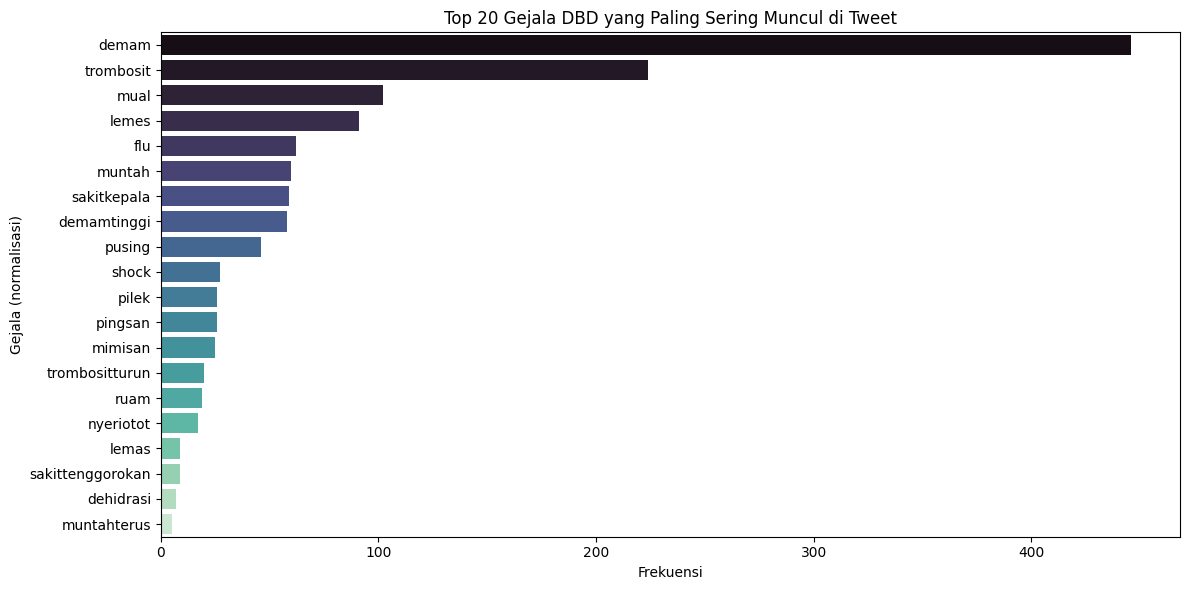


Contoh tweet yang mengandung gejala:

Tweet ke-0:
Text (cleaned_lower): tipes mending ke dokter kalau sakit biasa minum obat pasti sembuh pengalaman kemarin bgt demam trus biasa minum panadol obat demam pasti sembuh ini engga langsung ke dokter trus cek ternyata kena dbd lewat hari ud ke isekai
Gejala ditemukan: ['demam']

Tweet ke-5:
Text (cleaned_lower): terhadap demam berdarah dengue dbd yang bisa dilakukan sebelum dibawa ke rumah sakit apakah sobat mempunyai pengalaman tentang dbd yuuk tulis pengalaman mu di kolom komentar tetap harus diingat ya jangan lupa melakukan pemberantasan sarang nyamuk dan jentik seminggu
Gejala ditemukan: ['demam']

Tweet ke-6:
Text (cleaned_lower): kok gw pusing lg yah perasaan gw td udah smbuh bahkan td gw udh suuzon jgan jgan ini dokternya bilang gw dbd supaya gw bangkrut krna beli obat mahal doang tp kayanya gw beneran sakit deh ah benci bgt
Gejala ditemukan: ['pusing']

Tweet ke-10:
Text (cleaned_lower): berdasarkan pengalaman aku dulu pernah lagi s

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 6. VISUALISASI TOP SYMPTOMS
top_n = 20
top_symptoms = symptom_counts[:top_n]
labels, counts = zip(*top_symptoms)

plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(labels), palette='mako')
plt.title(f"Top {top_n} Gejala DBD yang Paling Sering Muncul di Tweet")
plt.xlabel("Frekuensi")
plt.ylabel("Gejala (normalisasi)")
plt.tight_layout()
plt.show()

# 7. TAMPILKAN CONTOH TWEET DENGAN SYMPTOMS
print("\nContoh tweet yang mengandung gejala:")
for i, row in filtered_df.head(5).iterrows():
    print(f"\nTweet ke-{i}:")
    print(f"Text (cleaned_lower): {row['text_cleaned_lower']}")
    print(f"Gejala ditemukan: {row['symptoms_found']}")

# 8. SIMPAN HASIL FILTER KE FILE BARU (dengan dan tanpa gejala)
output_file_symptom = 'filtered_tweets_with_symptoms_1Juni2025.xlsx'
filtered_df.to_excel(output_file_symptom, index=False)
print(f"\nData hasil filter gejala disimpan ke file: {output_file_symptom}")

output_file_non_symptom = 'filtered_tweets_without_symptoms.xlsx'
non_symptom_df.to_excel(output_file_non_symptom, index=False)
print(f"Data hasil filter tanpa gejala disimpan ke file: {output_file_non_symptom}")

# Download kedua file
files.download(output_file_symptom)
files.download(output_file_non_symptom)
